<h1>Scipy Optimization</h1>  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

<h1>Part 1: Linear programming (multivariable problems)

The function linprog can minimize a linear objective function subject to <font color='red'>linear</font> equality and inequality constraints. This kind of problem is well known as linear programming. Linear programming solves problems of the following form:
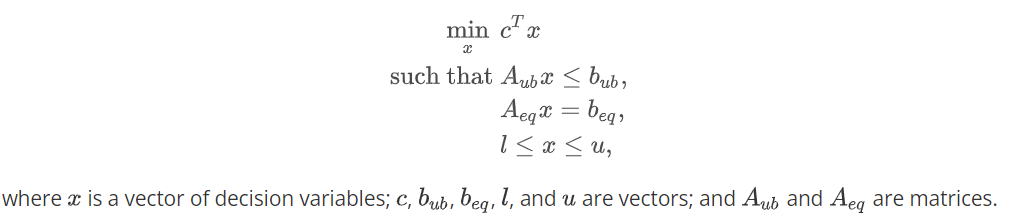

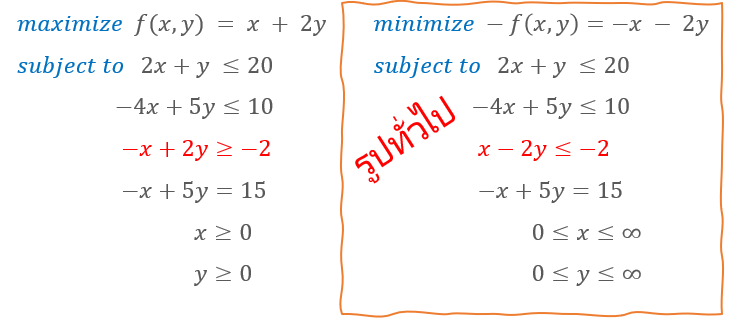

Here we will try to solve a typical linear programming problem using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog'>scipy.optimize.linprog()</a>

<h2>Example linear programming

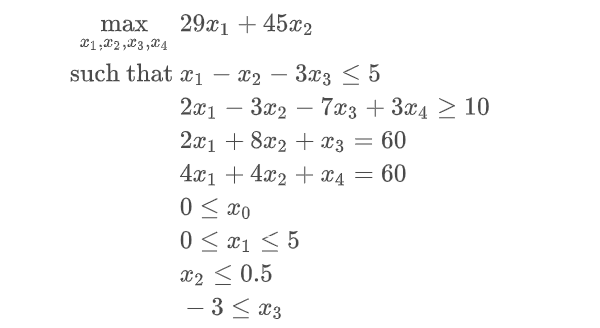

<h3>Steps of solving with linear programming</h3>
<p>Let solve this linear programming with scipy.optimize.linprog
    
<p>
   
1. หากเป็น maximization ให้กลับเป็น minimization และเพิ่มตัวแปรตัดสินใจเข้าไปให้ครบ (ดูจาก constraint)
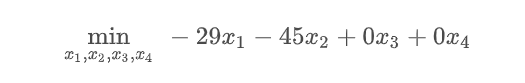

2. หากมี inequality constraint ในรูป >= ให้เปลี่ยนให้อยู่ในรูปมาตรฐาน <font color='red'> \<= </font> โดยการคูณตลอดด้วย -1. นอกจากนี้ แสดงตัวแปรตัดสินใจให้ครบทุกตัว

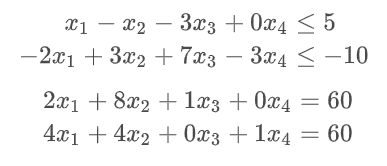

3. The first two inequality constraints can be rewritten in matrix forms:
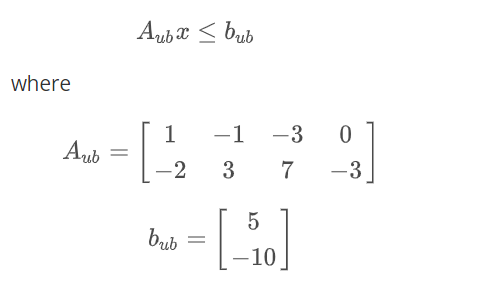

4. The two equality constraints can be rewritten into a matrix form:
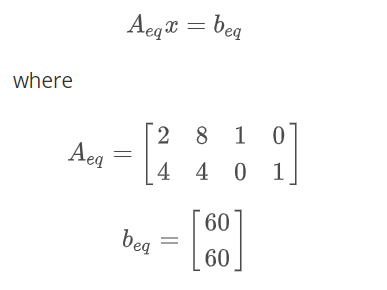

In [8]:
import numpy as np
from scipy.optimize import linprog

# The coefficients of the linear objective function to be minimized.
c = np.array([-29.0, -45.0, 0.0, 0.0])

# Each row of A_ub specifies the coefficients of a linear inequality constraint on x.
lhs_ineq = np.array([[1.0, -1.0, -3.0, 0.0],
                 [-2.0, 3.0, 7.0, -3.0]])

# Each element represents an upper bound on the corresponding value of A_ub @ x.
rhs_ineq = np.array([5.0, -10.0])

# Each row of A_eq specifies the coefficients of a linear equality constraint on x.
lhs_eq = np.array([[2.0, 8.0, 1.0, 0.0],
                 [4.0, 4.0, 0.0, 1.0]])

# Each element of A_eq @ x must equal the corresponding element of b_eq.
rhs_eq = np.array([60.0, 60.0])

# defining the minimum and maximum values of that decision variable. 
# Use None to indicate that there is no bound. By default, bounds are (0, None)
# (all decision variables are non-negative).
x0_bounds = (0, None)
x1_bounds = (0, 5.0)
x2_bounds = (-np.inf, 0.5)  # +/- np.inf can be used instead of None
x3_bounds = (-3.0, None)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]

# run the linprog() function to optimize the linear programming
result = linprog(c, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds)

print(result)

           con: None
 crossover_nit: 0
         eqlin:  marginals: None
  residual: None
           fun: None
       ineqlin:  marginals: None
  residual: None
         lower:  marginals: None
  residual: None
       message: "The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is b'At lower/fixed bound')"
           nit: 3
         slack: None
        status: 2
       success: False
         upper:  marginals: None
  residual: None
             x: None


The result states that our problem is infeasible (return status = 2), meaning that some constraints are not met. Suppose, however, that we were to decide that our bound constraint on x1 was too tight and that it could be loosened to 0 <= x1 <= 6. After adjusting our code x1_bounds = (0, 6) to reflect the change and executing it again:

In [9]:
x1_bounds = (0, 6)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]

result = linprog(c, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds)
print(result)

           con: array([0., 0.])
 crossover_nit: 0
         eqlin:  marginals: array([-2.88717949, -5.41538462])
  residual: array([0., 0.])
           fun: -505.974358974359
       ineqlin:  marginals: array([-5.17435897, -1.80512821])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0., 0., 0.])
  residual: array([9.41025641, 5.17948718,        inf, 4.64102564])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 3
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0.])
  residual: array([       inf, 0.82051282, 0.75641026,        inf])
             x: array([ 9.41025641,  5.17948718, -0.25641026,  1.64102564])


<h2>Practice: </h2>

Say that a factory produces four different products, and that the daily produced amount of the first product is x₁, the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:

1. The profit per unit of product is USD 20, 12, 40, and 25 for the first, second, third, and fourth product, respectively. </P>
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.</P>

3. For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. Finally, each unit of the fourth product requires three units of B.</P>

4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and ninety units of B per day.</P>

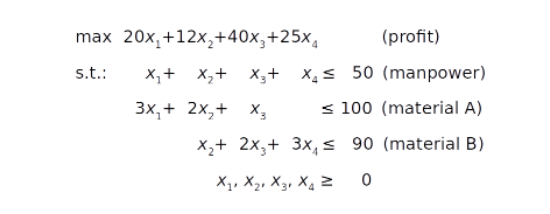

In [10]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Manpower
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

# by default, bounds are (0, None) (all decision variables are non-negative).
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -1900.0
       ineqlin:  marginals: array([-20.,  -0., -10.])
  residual: array([ 0., 40.,  0.])
         lower:  marginals: array([ 0., 18.,  0., 25.])
  residual: array([ 5.,  0., 45.,  0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 4
         slack: array([ 0., 40.,  0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf])
             x: array([ 5.,  0., 45.,  0.])

The result tells you that the maximal profit is 1900 and corresponds to x₁ = 5 and x₃ = 45. It’s not profitable to produce the second and fourth products under the given conditions. You can draw several interesting conclusions here:

1. The third product brings the largest profit per unit, so the factory will produce it the most.</P>

2. The first slack is 0, which means that the values of the left and right sides of the manpower (first) constraint are the same. The factory produces 50 units per day, and that’s its full capacity.</P>

3. The second slack is 40 because the factory consumes 60 units of raw material A (15 units for the first product plus 45 for the third) out of a potential 100 units.</P>

4. The third slack is 0, which means that the factory consumes all 90 units of the raw material B. This entire amount is consumed for the third product. That’s why the factory can’t produce the second or fourth product at all and can’t produce more than 45 units of the third product. It lacks the raw material B.</P>

Ref: https://realpython.com/linear-programming-python/

# โจทย์ลองปฏิบัติ – Nutrition Requirement

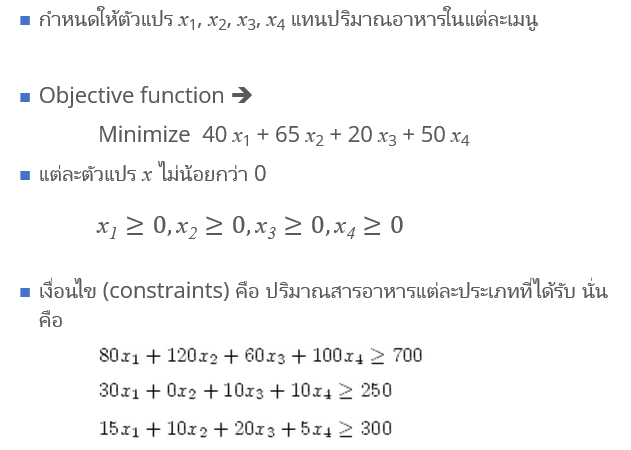

In [14]:
obj = [40, 65, 20, 50]

lhs_ineq = [[-80, -120, -60, -100], 
            [-30, 0, -10, -10],
            [-15, -10, -20, -5]]

rhs_ineq = [-700,
            -250, 
            -300]

# by default, bounds are (0, None) (all decision variables are non-negative).
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 411.1111111111111
       ineqlin:  marginals: array([-0.        , -1.11111111, -0.44444444])
  residual: array([355.55555556,   0.        ,   0.        ])
         lower:  marginals: array([ 0.        , 60.55555556,  0.        , 36.66666667])
  residual: array([ 4.44444444,  0.        , 11.66666667,  0.        ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([355.55555556,   0.        ,   0.        ])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf])
             x: array([ 4.44444444,  0.        , 11.66666667,  0.        ])

x1 = 4.44, x2 = 0, x3 = 16.67, x4 = 0

<h1>Part 2: การหาค่าเหมาะที่สุดของฟังก์ชันหลายตัวแปรแบบใช้ gradient<p><p>(Optimizing non-linear multivariate problems using gradient)</h1>
<p>Using scipy.optimize.minimize()
<p>Ref: http://apmonitor.com/che263/index.php/Main/PythonOptimization

<h2>Gradient descent algorithm</h2>
<p>Gradient descent algorithm หมายถึง การวนหาค่าที่ทำให้ค่าต่ำสุดจากการคำนวณจากความชันที่จุดที่เราอยู่แล้วพยายามเดินทางไปทางตรงข้ามกับความชันที่คำนวณขึ้นมา
<p>

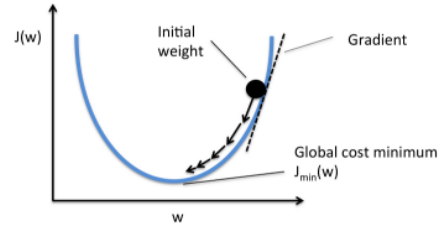


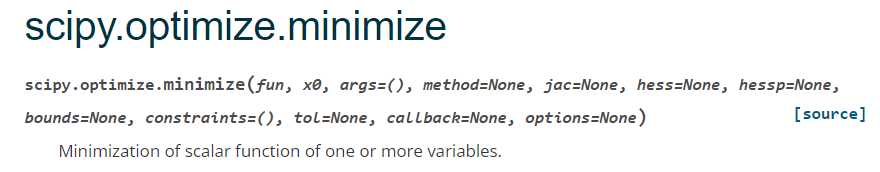

Method SLSQP of minimize() uses Sequential Least SQuares Programming to minimize a function of several variables with any combination of bounds, equality and inequality constraints. The method wraps the SLSQP Optimization subroutine originally implemented by Dieter Kraft. Note that the wrapper handles infinite values in bounds by converting them into large floating values.

<p>Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

<h2>Example</h2>

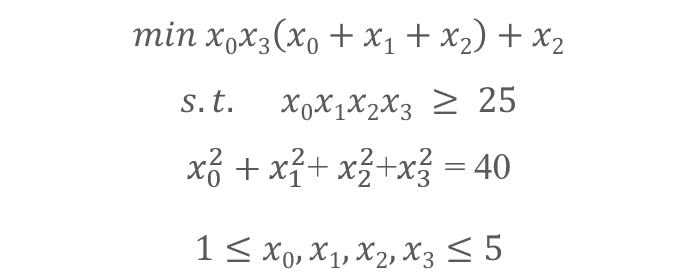

Transform the problem into the standard form:
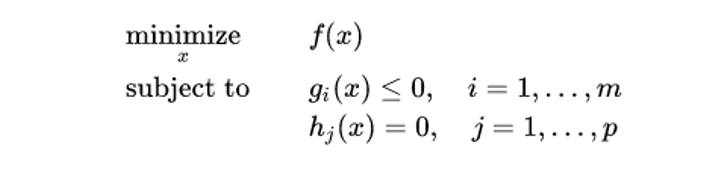

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def objective(x):
    return x[0] * x[3] * (x[0] + x[1] + x[2]) + x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] - 25.0

def constraint2(x):
    diff = x[0]*x[0] + x[1]*x[1] + x[2]*x[2] + x[3]*x[3] - 40
    return diff

In [3]:
# initial guesses
x0 = np.zeros(4)
x0[0] = 4.9
x0[1] = 4.9
x0[2] = 4.9
x0[3] = .1

# show initial objective
print('Initial Objective:', objective(x0))

# set boundaries
b = (1.0, 5.0)

# set constraints
c1 = {'type': 'ineq', 'fun': constraint1}
c2 = {'type': 'eq',   'fun': constraint2}

Initial Objective: 12.103000000000002


In [4]:
# perform optimization and report results

solution = minimize(objective, x0, method='SLSQP', 
                    bounds=[b, b, b, b], constraints=[c1, c2])
x = solution.x

# show final objective
print('Final Objective: ', objective(x))

# print solution
print('Solution')
print('x1 =', x[0])
print('x2 =', x[1])
print('x3 =', x[2])
print('x4 =', x[3])

Final Objective:  17.014017239003625
Solution
x1 = 1.0
x2 = 4.7430164561432395
x3 = 3.821128024999321
x4 = 1.3794113252906695


<h3>Reference:</h3>
<p>https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html

<h1>Part 4: การหาค่าเหมาะที่สุดของฟังก์ชันหลายตัวแปรแบบไม่ใช้ gradient<p><p>(Optimizing multivariate problems without using gradient)</h1>

<p>Using differential evolution algorithm
    
<p>Storn, R., Price, K. Differential Evolution – A Simple and Efficient Heuristic for global Optimization over Continuous Spaces. Journal of Global Optimization 11, 341–359 (1997).
    
<p>Differential evolution (DE) is a population-based metaheuristic search algorithm that optimizes a problem by iteratively improving a candidate solution based on an evolutionary process. Such algorithms make few or no assumptions about the underlying optimization problem and can quickly explore very large design spaces. DE is arguably one of the most stable population-based search algorithms that exhibits robustness to multi-modal opt functions with many local optima whose functions are not requiredd to be differentiable.

In [18]:
from scipy.optimize import differential_evolution
import numpy as np

In [19]:
# First, let's try a simple problem: f(x0, x1) = x0 * x0 + x1 * x1
#
def fobj(x):
  value = 0
  for i in range(len(x)):
      value += x[i]**2
  return value / len(x)

result = differential_evolution(fobj, bounds=[(-20, 20), (-20, 20)])
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 91
 success: True
       x: array([0., 0.])

In [20]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-20, 20), (-20, 20)]

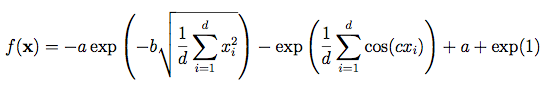
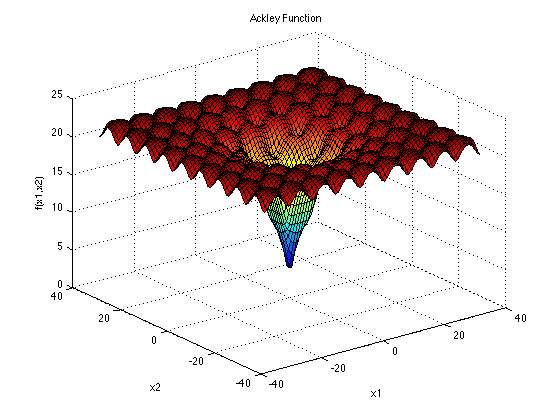

In [21]:
result = differential_evolution(ackley, bounds)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2733
     nit: 88
 success: True
       x: array([0., 0.])

In [22]:
result.x, result.fun

(array([0., 0.]), 4.440892098500626e-16)

<h2>Part 4.2: Differential Evolution with constraints (Method 1: using NonlinearConstraint())</h2>
<p>https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html

In [23]:
from scipy.optimize import NonlinearConstraint, Bounds

# the sum of x[0] and x[1] must be greater than 1.0
#
def con1(x):
    return np.array(x[0] + x[1])

# scipy.optimize.NonlinearConstraint(constrained function, lb, ub)
#
nlc = NonlinearConstraint(con1, 1.0, np.inf)

# specify limits using a `Bounds` object.
bounds = [(-15, 15), (-15, 15)]
result = differential_evolution(ackley, bounds, constraints=(nlc))
result.x, result.fun

C:\Users\chuki\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


(array([0.97728032, 0.02272069]), 2.6098162431150773)

<h2>Part 4.3: Differential Evolution with constraints (Method 2: Manually hand-crafted)</h2>
<p>https://stackoverflow.com/questions/43284991/constraints-on-parameters-using-scipy-differential-evolution

In [16]:
def ackley_cons(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    
    if x[0] + x[1] >= 1.0: # this is your additional constraint
        return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
    else:
        return 999999    # some high value

bounds = [(-15, 15), (-15, 15)]
result = differential_evolution(ackley_cons, bounds)
result.x, result.fun

(array([0.97646237, 0.02393896]), 2.6103778523301)

### This is the end of this Python notebook

### Addendum: plotting 3D charts using matplotlib

C:\Users\chuki\AppData\Local\Temp/ipykernel_10976/4023516924.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection="3d")


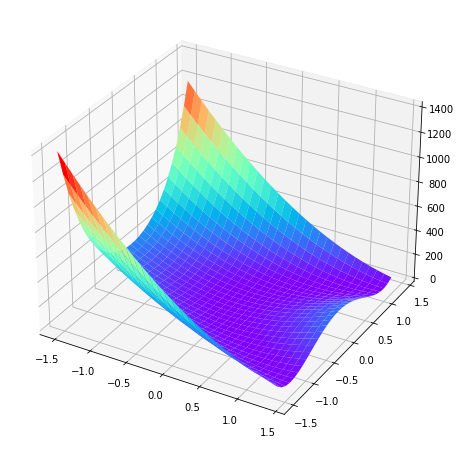

In [17]:
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(-1.5, 1.5, 0.1)
x, y = np.meshgrid(r, r)
z = 100 * (x - y*y)**2 + (1 - y)*(1 - y)  # Rosenbrock
fig = plt.figure(figsize=(12,8))
axes = fig.gca(projection="3d")
axes.plot_surface(x, y, z, cmap="rainbow")

plt.show()

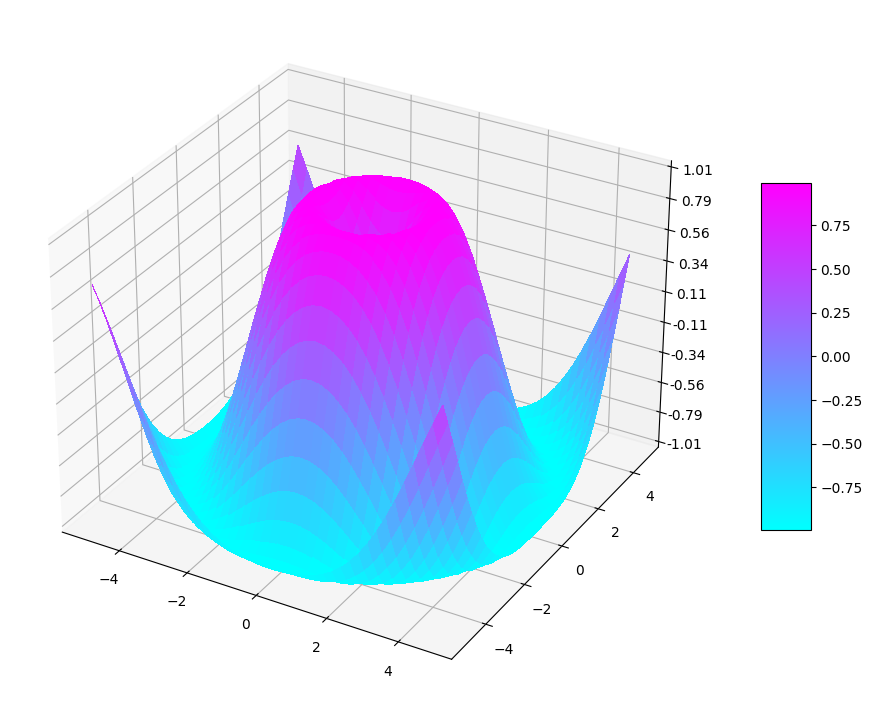

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": '3d'}, figsize=(15,9))
# Make data.
X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='cool',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=7) # maps values to colors.
plt.show()